In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

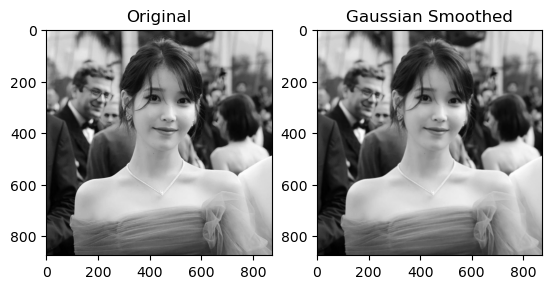

In [2]:
'''
Step 1. Gaussian Smoothing
'''
img = cv2.imread('iu.jpg', cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(img, (0, 0), 1)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Smoothed")
plt.show()

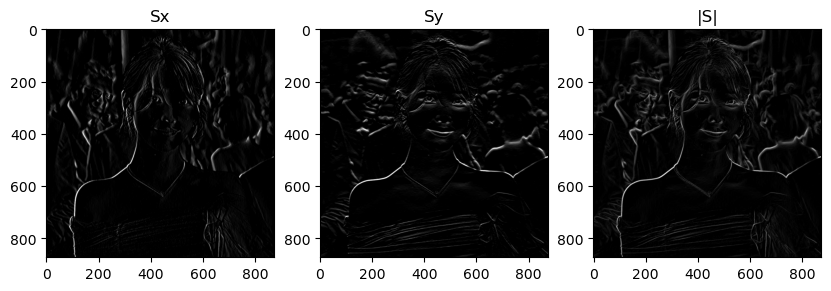

In [3]:
'''
Step 2. Getting Gradient
'''
sx = cv2.Sobel(blurred, -1, 1, 0) # df/dx
sx = sx / sx.max() * 255 # Normalize
sy = cv2.Sobel(blurred, -1, 0, 1) # df/dy
sy = sy / sy.max() * 255 # Normalize
s = np.hypot(sx, sy) # |grad f|
s = s / s.max() * 255 # Normalize
theta = np.arctan2(np.abs(sy), np.abs(sx)) # Gradient direction

plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.imshow(sx, cmap="gray")
plt.title("Sx")
plt.subplot(1, 3, 2)
plt.imshow(sy, cmap="gray")
plt.title("Sy")
plt.subplot(1, 3, 3)
plt.imshow(s, cmap="gray")
plt.title("|S|")
plt.show()

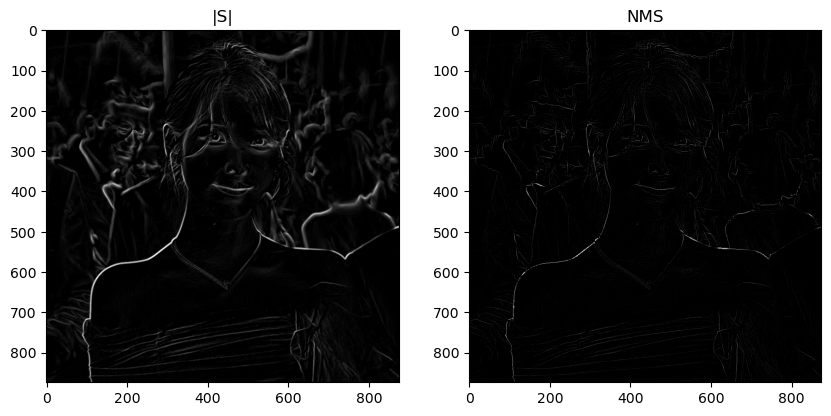

In [4]:
'''
Step 3. Non-maximum Suppression
'''
row, col = s.shape
nms = np.zeros((row, col))
angle = np.rad2deg(theta) # Rad -> Degree
angle[angle < 0] += 180 

for i in range(1, row - 1):
    for j in range(1, col - 1):
        q, r = 255, 255

        if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
            q = s[i, j+1]
            r = s[i, j-1]
            
        elif (22.5 <= angle[i, j] < 67.5):
            q = s[i+1, j-1]
            r = s[i-1, j+1]

        elif (67.5 <= angle[i,j] < 112.5):
            q = s[i+1, j]
            r = s[i-1, j]

        elif (112.5 <= angle[i,j] < 157.5):
            q = s[i-1, j-1]
            r = s[i+1, j+1]
        
        # NMS
        if (s[i,j] >= q) and (s[i,j] >= r):
            nms[i,j] = s[i,j]
        else:
            nms[i,j] = 0
            
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(s, cmap="gray")
plt.title("|S|")
plt.subplot(1, 2, 2)
plt.imshow(nms, cmap="gray")
plt.title("NMS")
plt.show()

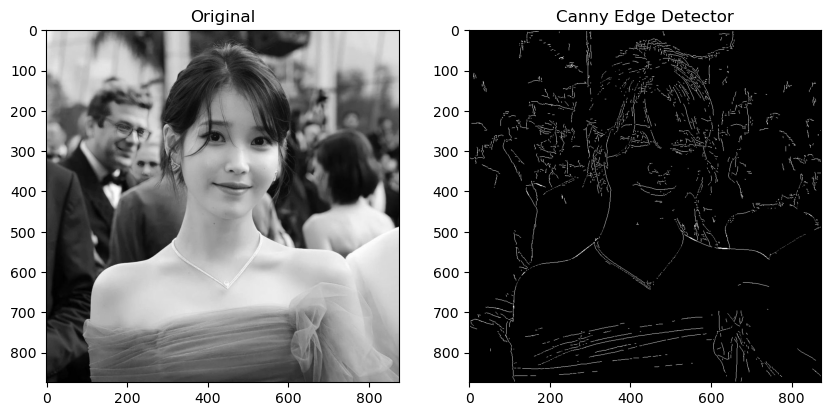

In [5]:
'''
Step 4: Hysteresis Thresholding
'''
canny = np.zeros((row, col))

# Thresholds
high = 30
low = 5

for i in range(1, row - 1):
    for j in range(1, col - 1):
        try:
            if nms[i, j] > high:
                canny[i, j] = 255
            elif low < nms[i, j] <= high:
                if (nms[i-1, j-1] > high) or (nms[i-1, j] > high) or (nms[i-1, j+1] > high) or (nms[i, j-1] > high) or (nms[i, j] > high) or (nms[i, j+1] > high) or (nms[i+1, j-1] > high) or (nms[i+1, j] > high) or (nms[i+1, j+1] > high):
                    canny[i, j] = 255
                else:
                    canny[i, j] = 0
            else:
                canny[i, j] = 0
        except IndexError as e:
            pass

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(canny, cmap="gray")
plt.title("Canny Edge Detector")
plt.show() 

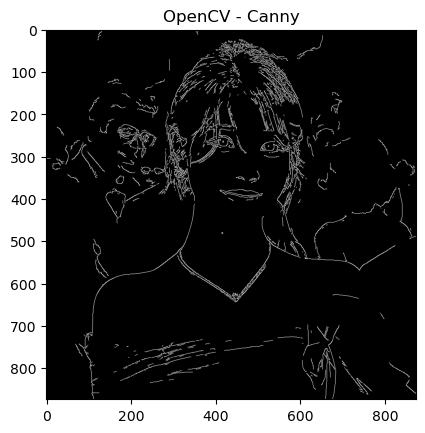

In [6]:
cv_canny = cv2.Canny(img, 100, 150)

plt.figure()
plt.imshow(cv_canny, cmap="gray")
plt.title("OpenCV - Canny")
plt.show()